<a href="https://colab.research.google.com/github/vijaysankar1985/vijaysankar1985/blob/main/Airlines_passenger_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Analysis using Facebook Prophet on Airlines Passenger Dataset**

Dataset Source: https://www.kaggle.com/datasets/thedevastator/airlines-traffic-passenger-statistics

# **Introduction**
Time series analysis is one of the important methodologies which helps us to understand the hidden patterns in a dataset that is too related to the time at which it is being recorded.

# What is Time Series Forecasting?
Predicting the future values of the data by analyzing the previous trends and the patterns hidden in the data is known as time series forecasting.

# Time series forecasting past, present and future
With time, multiple time series analyses and forecasting techniques that have evolved in the market like *ARIMA* or *SARIMA*, one can also use deep learning-based methods like *LSTM* and *RNN* which are specially designed for performing forecasting and analysis of sequential data.

# **Importing necessary libararies for starting analysis**

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

# **Loading Data Sets**
We can directly upload the dataset into Colab by clicking the files icon in the extreme left and upload it.


```
Note:
Make sure you have the copy of original data sets, for future use incase of data being used wrongly.
```



In [9]:
df=pd.read_csv('/content/international-airline-passengers.csv')

# Checking for data properly loaded or not?
Call the variable name where the file is uploaded in the above step.

In [ ]:
df

In [12]:
df.shape

(145, 2)

# **Format the column 'ds'for required further process**

In [13]:
df.columns=['ds','y']

In [14]:
df

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      145 non-null    object 
 1   y       144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


# **Cleaning the data**
In the dataset, we noticed that a row contains 'NaN' as value in row#144, we need to remove that row, so that the analysis is seamless.

In [16]:
df.drop(144,axis=0,inplace=True)

In [18]:
df

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


# **Data Type Conversion**
We can notice that, while executing *df.info()*, we get data type of column *ds* to be *Object* as the data type. Since we are interested in Time Series forecasting, this data type can cause trouble for modelling and further testing and training. So, we convert to *datetime64* datatype for timeline series predictions.

# **About FB Prophet Model Data Types**
Facebook Prophet predicts data only when it is in a certain format. The dataframe with the data should have a column saved as *ds* for time series data and *y* for the data to be forecasted. Here, the *time series* is the column *Month* and the data to be forecasted is the column #Passengers. So let_s make a new dataframe with new column names and the same data. Also, *ds* should be in a *DateTime* format.

In [19]:
df['ds']=pd.to_datetime(df['ds'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


# **Importing Prophet model (by Facebook)**
*Prophet* is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

In [21]:
from prophet import Prophet

In [46]:
from prophet.plot import add_changepoints_to_plot

In [24]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'p

# **Initializing a Prophet Model**
By using the *Prophet()* command we can initialize an instance of the *prophet* model for the training on our dataset and then help us to perform time series forecasting.

In [25]:
model=Prophet()

In [ ]:
df.isnull()

In [28]:
df.isnull().sum()

ds    0
y     0
dtype: int64

In [29]:
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl88tdwhp/zvy5h2o2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl88tdwhp/md5vy90s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91521', 'data', 'file=/tmp/tmpl88tdwhp/zvy5h2o2.json', 'init=/tmp/tmpl88tdwhp/md5vy90s.json', 'output', 'file=/tmp/tmpl88tdwhp/prophet_modeltausnuma/prophet_model-20230609062243.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:22:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:22:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# **Prediction Starts Here!**
We want our model to predict the next 5 years, that is, till 1965. The frequency of our data is 1 month and thus for 5 years, it is 12 * 5 = 60 months. So we need to add 60 to more rows of monthly data to a dataframe.
It can be exceuted by the following code:


```
future_dates = model.make_future_dataframe(periods=12 * 5,
                                 freq='M')
```
But, we have (for practice), taken for 365 days to get more datasets. So, we will excute like this:

```
future_dates=model.make_future_dataframe(periods=365)
```




In [40]:
future_dates=model.make_future_dataframe(periods=365)

In [39]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [41]:
future_dates

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30


# **Target Variable for prediction**
Now in the future dataframe we have just ds values and we should predict the y values. Here we name it as *predict_values*,


```
predict_values = model.predict(future)
predict_values[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend','trend_lower', 'trend_upper']].tail()
```



In [42]:
predict_values=model.predict(future_dates)

In [48]:
predict_values[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend','trend_lower', 'trend_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
504,1961-11-27,499.573534,468.826230,528.397526,520.934753,520.321423,521.556595
505,1961-11-28,497.972130,468.356817,526.455268,521.035587,520.419330,521.662026
506,1961-11-29,495.649432,466.672531,522.294098,521.136420,520.517992,521.767457
507,1961-11-30,492.646963,463.774976,522.018512,521.237254,520.617212,521.872887
508,1961-12-01,489.023969,458.989582,517.957828,521.338087,520.715687,521.978318


# **Plotting the forecasted values**
In the above table, *ds* as we know, is the time series data:


1.   *yhat* is the prediction, *yhat_lower*, and *yhat_upper* are the uncertainty levels(it basically means the prediction and actual values can vary within the bounds of the uncertainty levels). 
2.   Next up we have a *trend* that shows the long-term growth, shrink, or stagnancy of the data, *trend_lower*, and *trend_uppe*r is the uncertainty levels.


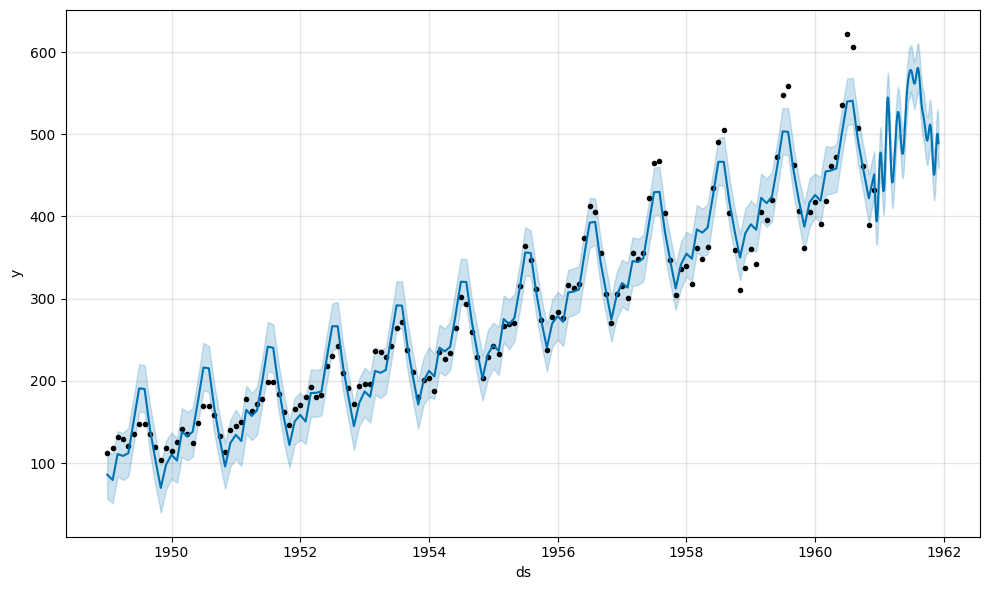

In [50]:
forecast_fig_1 = model.plot(predict_values)

# Above Graph Explained
1.   The below image shows the basic prediction.
2.   The light blue shady line zones are the uncertainty level(*yhat_upper* and *yhat_lower*).
3.   The dark blue line is the prediction(*yhat*).
4.   The black dots are the original data.

**Inference:** 
1.   We can see that the predicted data is very close to the actual data.
2.   In the last five years, there is no “actual” data, but looking at the performance of our model in years where data is available it is safe to say that the predictions are close to accurate.


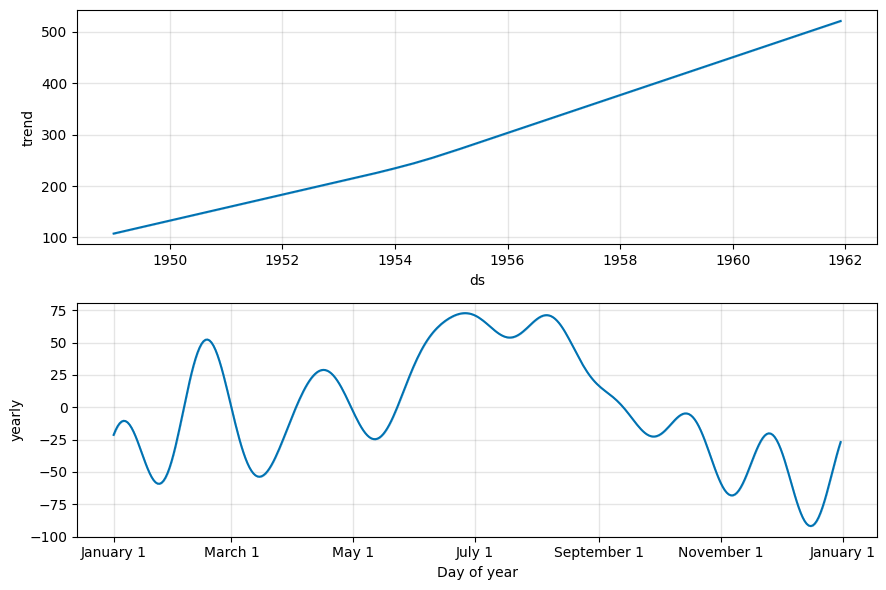

In [51]:
forecast_fig_2 = model.plot_components(predict_values)

# Above 2 Graphs Explained
The above 2 images show the *trends* and *seasonality*(in a year) of the time series data.
# Graph 1
We can see there is an increasing trend, meaning the number of air passengers has increased over time. 
# Graph 2
If we look at the seasonality graph, we can see that June and July is the time with the most passengers in a given year.

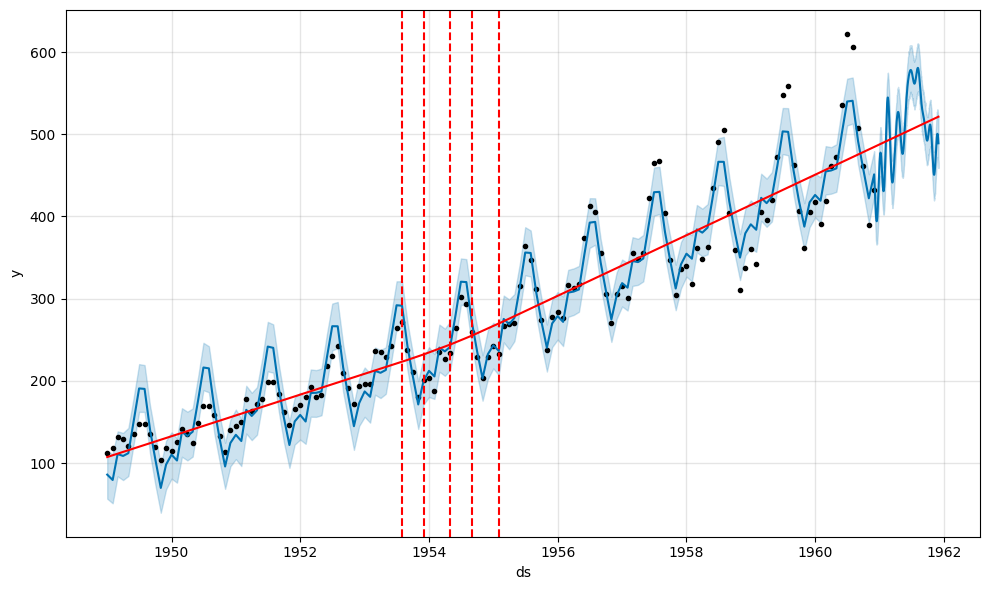

In [53]:
forecast_fig_3 = model.plot(predict_values)
a = add_changepoints_to_plot(forecast_fig_3.gca(),
                             model, predict_values)

***Add changepoints*** to indicate the time in rapid trend growths. *The dotted red lines show the time when there was a rapid change in the trend of the passengers*. 



---


Thus, we have seen how we can design a prediction model using Facebook Prophet with only a few lines of code which would have been very difficult to implement using traditional machine learning algorithms and mathematical and statistical concepts alone.

---

